In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

# Introduction

The exercise has been taken from the book "Introduction to Statistical Learning" (https://www.amazon.es/Introduction-Statistical-Learning-Applications-Statistics/dp/3031387465/ref=tmm_hrd_swatch_0?_encoding=UTF8&sr=8-1)



# Practice #2

Regression trees with Boston dataset

## Data Loading

For this practice we will make use of the Boston Dataset, which was included into the sklearn datasets (it is discontinued as it was catalogued as non-ethical).
<BR>
It consists of 506 rows and 14 columns. The goal is to predict the **MEDV** variable.

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- AFRO - 1000(Bk - 0.63)^2 where Bk is the proportion of Afroamerican by town
- LSTAT - % lower status of the population
- **MEDV - Median value of owner-occupied homes in $1000's**


Let's load the dataset and split it into training and test

In [3]:
import openpyxl

# Red data
filename = 'DATA/boston.xlsx'
df = pd.read_excel(filename, index_col=0) #it has two sheets, we load the 2nd one
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AFRO,LSTAT,MEDV
Id,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AFRO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


It is not the scope of this practice to focus on other things rather than the Decision Trees themselves. So I leave to you as future work the inspecting of the dataset profiling and the feature engineering process.

Since there are not null values I will just divide the dataframe into training and test.

In [5]:
from sklearn.model_selection import train_test_split

def split_df(dataframe, seed=None, percentage=0.8):
    
    X = dataframe.loc[:, dataframe.columns != 'MEDV']
    y = dataframe['MEDV']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed)

X_train, X_test, y_train, y_test = split_df(df, seed=42, percentage=0.5)

## Single Tree

Now we can create our first decision tree. The basic DT is implemented in sklearn in the DecisionTreeRegressor method. 
<BR>You can take a look to its configuration and hyperparameters in the following link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

For the practice we will use the default parameters.

In [6]:
from sklearn.tree import DecisionTreeRegressor

boston_tree = DecisionTreeRegressor(random_state=42) 
boston_tree.fit(X_train, y_train);

By default, the tree uses the squared_error (MSE), although it penalizes larger errors more, since it squares them.
<BR>The tree searches for the split that minimizes the MSE in the child nodes (minimizing the variance).
<BR>
<BR>(If we have outliers, one of the alternatives is to use the absolute_error (MAE), which is more robust to outliers because it penalizes errors linearly).


Let's take a look to the performance of the classifier.

In [7]:
from sklearn.metrics import mean_squared_error
predictions = boston_tree.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE = {0:.4f}".format(mse))

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE = {mape:.2f}%")

MSE = 28.4372
MAPE = 16.26%


We can also make sense of the quality of the predictions by plotting them against the actual values

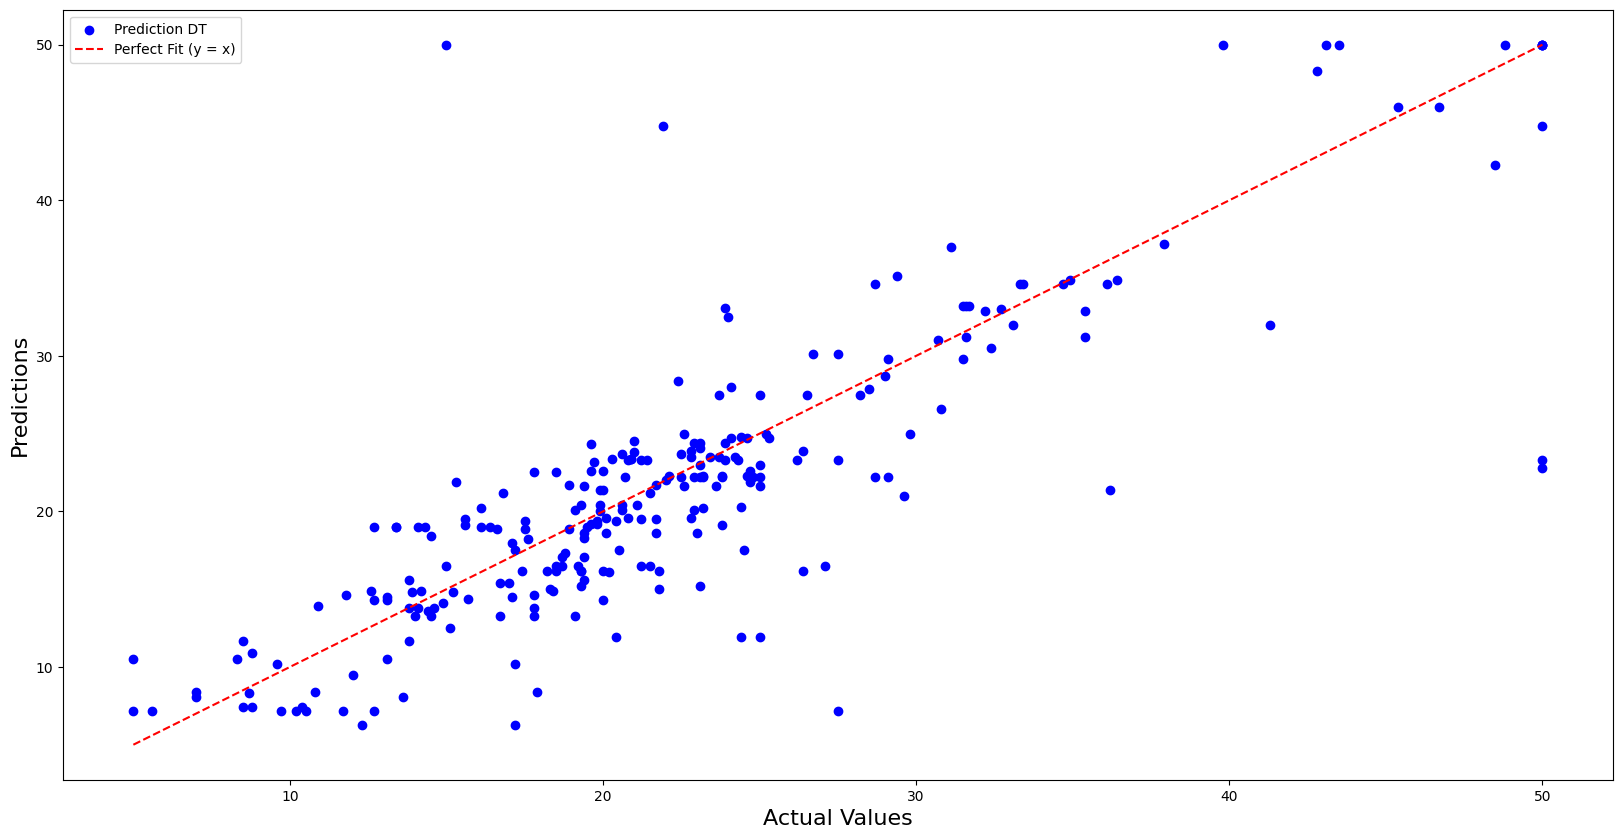

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(y_test,boston_tree.predict(X_test),color='blue',label='Prediction DT')
min_val, max_val = min(y_test.min(), boston_tree.predict(X_test).min()), max(y_test.max(), boston_tree.predict(X_test).max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Perfect Fit (y = x)")
plt.xlabel("Actual Values", fontsize=16)
plt.ylabel("Predictions", fontsize=16)
plt.legend(loc='upper left');
plt.show()

Now we will take a look to the tree itself. We will need to make use of an external library: `pydotplus`.

In [ ]:
# ! pip install pydotplus

# ! pip install graphviz 
# you may need to install this library directly from https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
# and then uncomment following two lines
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'(installation folder)

from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names,
                    filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png("boston_train.png")
    return Image(graph.create_png())

In [ ]:
plot_tree(boston_tree, X_train.columns)

In [9]:
# How many nodes and leaves?
print("Number of nodes: ", boston_tree.tree_.node_count)
print("Number of leaves: ", boston_tree.get_n_leaves())

Number of nodes:  479
Number of leaves:  240


Two aspects can be highlighted after taking a look at the tree:
 - The tree is huge! As we have not set any complexity pruning or max_depth we have allowed the tree to grow without any limit
 - `RM` and `LSTAT` seem to be the most important features in order to predict the value of the houses. The variable `RM` measures the number of rooms (i.e., the size of the house). The tree indicates that larger houses correspond to more expensive houses. The `LSTAT` (the percentage of individuals with lower socioeconomic status) indicates that houses in expensive neighborhoods are more expensive

We can confirm this later point by plotting the feature importance

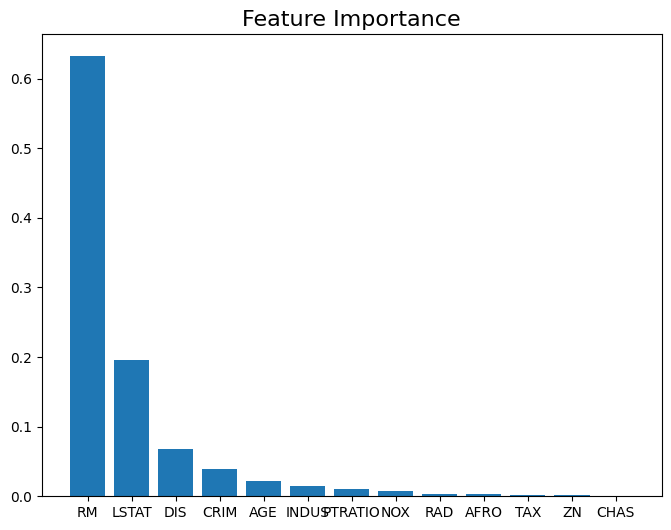

In [10]:
plt.figure(figsize=(8,6))
importances = boston_tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(X_train.columns[indices], importances[indices]) #average reduction in MSE resulting from splitting at each node of the tree using that feature
plt.title('Feature Importance', fontsize=16);

Now we will prune the tree to see if we can improve performance.

There are different Pruning Parameters:

 - max_leaf_nodes: Reduce the number of leaf nodes
 - min_samples_leaf: Restrict the size of sample leaf. Minimum sample size in terminal nodes can be fixed to a specific value or a % of total 
 - max_depth: Reduce the depth of the tree to build a generalized tree. 

Let's focus on the depth of the tree. We will test different depth thresholds via CV (k-fold) by using the `GridSearchCV` provided by sklearn.

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,16)} # 15 different depth levels

boston_tree_pruned_cv = GridSearchCV(boston_tree, 
                   param_grid,
                   scoring='neg_mean_squared_error', #negative since scikit always look to maximize metrics
                   cv=5 , n_jobs=1, verbose=1)

boston_tree_pruned_cv.fit(X_train,y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [12]:
print("Best parameters set found on train set:")
print()
print(boston_tree_pruned_cv.best_params_)
print()
print("Grid scores:")

means = boston_tree_pruned_cv.cv_results_['mean_test_score']
stds = boston_tree_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, boston_tree_pruned_cv.cv_results_['params']):
    print("MSE = %0.3f (+/%0.03f) for %r" % (-mean, std * 2, params))

Best parameters set found on train set:

{'max_depth': 10}

Grid scores:
MSE = 51.676 (+/16.694) for {'max_depth': 1}
MSE = 29.491 (+/10.384) for {'max_depth': 2}
MSE = 24.546 (+/17.720) for {'max_depth': 3}
MSE = 23.954 (+/20.005) for {'max_depth': 4}
MSE = 23.004 (+/19.699) for {'max_depth': 5}
MSE = 22.983 (+/14.807) for {'max_depth': 6}
MSE = 24.405 (+/22.418) for {'max_depth': 7}
MSE = 26.754 (+/17.717) for {'max_depth': 8}
MSE = 24.181 (+/19.637) for {'max_depth': 9}
MSE = 21.822 (+/12.996) for {'max_depth': 10}
MSE = 26.725 (+/18.362) for {'max_depth': 11}
MSE = 24.308 (+/13.612) for {'max_depth': 12}
MSE = 23.785 (+/23.791) for {'max_depth': 13}
MSE = 24.658 (+/19.529) for {'max_depth': 14}
MSE = 23.492 (+/13.097) for {'max_depth': 15}


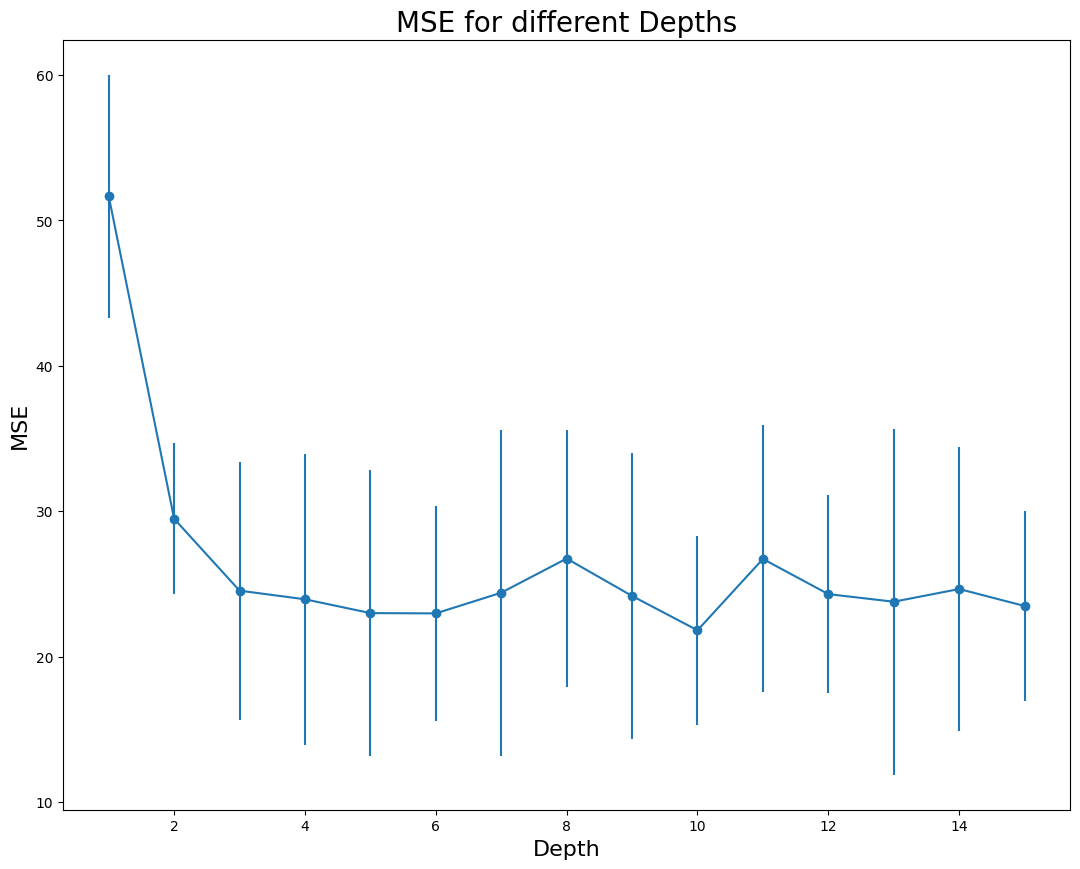

In [13]:
plt.figure(figsize=(13,10))
plt.errorbar(range(1,16,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('MSE for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("MSE", fontsize=16);

As can be seen in the plot, the optimal value for the depth of the decision tree is 10. However, we can find a local optimal at depth 6 (the difference does not appear to be high and the complexity is much reduced). <BR>Let's prune the tree with this value (6).

In [14]:
boston_tree_pruned = DecisionTreeRegressor(random_state=42, max_depth=6)
tree=boston_tree_pruned.fit(X_train, y_train)
predictions = boston_tree_pruned.predict(X_test)
mse_pruned = mean_squared_error(y_test, predictions)
print(f"MSE = {mse_pruned:.2f} vs. {mse:.2f} on the non-pruned tree")

mape_pruned = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE = {mape_pruned:.2f}% vs. {mape:.2f}% on the non-pruned tree")

MSE = 25.18 vs. 28.44 on the non-pruned tree
MAPE = 14.69% vs. 16.26% on the non-pruned tree


Great! We have reduced the error with a smaller tree. Let's plot it

In [15]:
# How many nodes and leaves?
print("Number of nodes: ", boston_tree_pruned.tree_.node_count)
print("Number of leaves: ", boston_tree_pruned.get_n_leaves())

Number of nodes:  81
Number of leaves:  41


In [16]:
from sklearn import tree

text_representation = tree.export_text(boston_tree_pruned, feature_names=list(X_test.columns))
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- RM <= 6.97
|   |--- LSTAT <= 14.40
|   |   |--- RM <= 6.54
|   |   |   |--- DIS <= 1.21
|   |   |   |   |--- value: [50.00]
|   |   |   |--- DIS >  1.21
|   |   |   |   |--- LSTAT <= 7.69
|   |   |   |   |   |--- AFRO <= 351.62
|   |   |   |   |   |   |--- value: [27.00]
|   |   |   |   |   |--- AFRO >  351.62
|   |   |   |   |   |   |--- value: [23.35]
|   |   |   |   |--- LSTAT >  7.69
|   |   |   |   |   |--- LSTAT <= 7.89
|   |   |   |   |   |   |--- value: [15.25]
|   |   |   |   |   |--- LSTAT >  7.89
|   |   |   |   |   |   |--- value: [21.02]
|   |   |--- RM >  6.54
|   |   |   |--- LSTAT <= 5.78
|   |   |   |   |--- PTRATIO <= 17.85
|   |   |   |   |   |--- LSTAT <= 4.77
|   |   |   |   |   |   |--- value: [30.72]
|   |   |   |   |   |--- LSTAT >  4.77
|   |   |   |   |   |   |--- value: [34.87]
|   |   |   |   |--- PTRATIO >  17.85
|   |   |   |   |   |--- DIS <= 4.22
|   |   |   |   |   |   |--- value: [22.80]
|   |   |   |   |   |--- DIS >  4.22
|   |   |   |   |   |  

### Tree visualizations

Visualize our pruned tree

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(boston_tree_pruned, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Save it into a high resolution image
graph.render("boston_pruned")